In [2]:
%matplotlib inline
import phik
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from phik import resources, report
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [7]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [8]:
# profile.to_notebook_iframe()

#### Variáveis podem ser classificadas da seguinte forma:

<strong>Variáveis Quantitativas:</strong> são as características que podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Podem ser contínuas ou discretas.
 - <strong>Variáveis discretas:</strong> características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros. Geralmente são o resultado de contagens. Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.
 - <strong>Variáveis contínuas:</strong> características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido. Usualmente devem ser medidas através de algum instrumento. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.

<strong>Variáveis Qualitativas (ou categóricas):</strong> são as características que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.
- <strong>Variáveis nominais:</strong> não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.
- <strong>Variáveis ordinais:</strong> existe uma ordenação entre as categorias. Exemplos: escolaridade (1o, 2o, 3o graus), estágio da doença (inicial, intermediário, terminal), mês de observação

## Comentários dos professores

Prof.Juvêncio

- Agora em se tratando  de correlação dos dados, dado que todas as features seguem uma distribuição normal menos uma que seguem outra distribuição não normal. Qual a correlação é preferível aplicar?  

R.  Muitas pessoas continuam usando o coeficiente de correlação de Pearson, sendo que este só é aplicável e fato quando as duas possuem distribuição normal.<strong> Se forem quantiativas, pode continuar usando o de Perason, sem problemas</strong>, agora se forem qualitativas ordinais, pode-se tentar o de Spearman por exemplo. Se forem nominais, pode-se usar algum indice de concordância, como o kappa ou o de Kendall.

Prof.César

- Agora em se tratando  de correlação dos dados, dado que todas as features seguem uma distribuição normal menos uma que seguem outra distribuição não normal. Qual a correlação é preferível aplicar?  

R. A correlação empírica (a que a gente revisou em sala), é válida para quaisquer distribuição dos dados. Mas se você quiser usar um coeficiente de correlação, tem o coeficiente de Pearson (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) e o de Spearman (https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). O de Pearson só captura correlações lineares, enquanto o de Spearman captura algumas correlações não-lineares, contanto que sejam monotônicas.

 - Citação sem uso de distribuição normal para pearson:<br>
https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


 - Citação de distribuição normal para usar pearson: <br>
https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/ <br>
https://www.socscistatistics.com/tests/pearson/default.aspx

-------------------------------------------------------

<strong>Estatísticas Kappa e coeficientes de Kendall -> Índice de concordância</strong>
<br>
https://support.minitab.com/pt-br/minitab/19/help-and-how-to/quality-and-process-improvement/measurement-system-analysis/supporting-topics/attribute-agreement-analysis/kappa-statistics-and-kendall-s-coefficients/

-----------------------------------------------

## Pearson's r
The Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. It's value lies between -1 and +1, -1 indicating total negative linear correlation, 0 indicating no linear correlation and 1 indicating total positive linear correlation. Furthermore, r is invariant under separate changes in location and scale of the two variables, implying that for a linear function the angle to the x-axis does not affect r.

#### For a sample

To calculate r for two variables X and Y, one divides the covariance of X and Y by the product of their standard deviations.

<img src="https://miro.medium.com/max/546/1*uOBToLtIFDfrNwnXLBv-7w.png">

In [9]:
df.corr(method = 'pearson')

""


-----------------------------------------------

## Spearman's ρ

The Spearman's rank correlation coefficient (ρ) is a <strong>measure of monotonic correlation between two variables</strong>, and is therefore better in catching nonlinear monotonic correlations than Pearson's r. It's value lies between -1 and +1, -1 indicating total negative monotonic correlation, 0 indicating no monotonic correlation and 1 indicating total positive monotonic correlation.

To calculate ρ for two variables X and Y, one divides the covariance of the rank variables of X and Y by the product of their standard deviations.

In [10]:
df.corr(method = 'spearman')

""


---------------------------------------------------

### Kendall's τ
Similarly to Spearman's rank correlation coefficient, the Kendall rank correlation coefficient (τ) <strong>measures ordinal association between two variables </strong>. It's value lies between -1 and +1, -1 indicating total negative correlation, 0 indicating no correlation and 1 indicating total positive correlation.

To calculate τ for two variables X and Y, one determines the number of concordant and discordant pairs of observations. τ is given by the number of concordant pairs minus the discordant pairs divided by the total number of pairs.

In [11]:
df.corr(method = 'kendall')

""


### Comentário relevante da professora Xin Dang

Both Spearman and Kendall tau correlations measure monotonicity relationships and have nice interpretation. The paper listed below compares Spearman and Kendall correlations in terms of robustness and statistical efficiency. In the normal case, the Kendall correlation is preferred than the Spearman correlation because of a smaller gross error sensitivity (GES) (more robust) and a smaller asymptotic variance (AV) (more efficient). If you are interested in other cases, you may compute their GES and AV by yourself. Make sure that two correlations measure the same quantity such that their GES and AV are comparable. 
However, in terms of computation, Kendall correlation has a O(n^2) computation complexity comparing with O(n logn) of Spearman correlation, where n is the sample size. 
<br>
https://www.researchgate.net/post/Does_Spearmans_rho_have_any_advantage_over_Kendalls_tau<br>
https://math.olemiss.edu/xin-dang/

------------------------------------

### Phik (φk)

Phik (φk) is a new and practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution. There is extensive documentation available here.


https://phik.readthedocs.io/en/latest/index.html

In [12]:
df.phik_matrix()

var2,bruises,cap-color,cap-shape,cap-surface,class,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-number,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color
var1,,,,,,,,,,,,,,,,,,,,,
bruises,1.000000,0.280636,0.353524,0.200454,0.708427,0.212208,0.807167,0.547950,0.452514,0.494364,...,0.041795,0.639604,0.606991,0.481338,0.490808,0.469883,0.154101,0.783349,0.774913,0.199829
cap-color,0.280636,1.000000,0.309571,0.360499,0.281663,0.320514,0.568713,0.606414,0.517648,0.559633,...,0.488048,0.880291,0.545442,0.530818,0.534844,0.724176,0.756236,0.407822,0.495496,0.242874
cap-shape,0.353524,0.309571,1.000000,0.307257,0.339560,0.212746,0.524641,0.479438,0.108258,0.425627,...,0.431363,0.297977,0.460748,0.401862,0.324542,0.490409,0.424878,0.242318,0.168853,0.337304
cap-surface,0.200454,0.360499,0.307257,1.000000,0.294330,0.314979,0.506619,0.412216,0.498024,0.353202,...,0.103169,0.270587,0.350068,0.378182,0.385134,0.374782,0.115339,0.350663,0.407656,0.327879
class,0.708427,0.281663,0.339560,0.294330,1.000000,0.199636,0.838625,0.749777,0.519680,0.410200,...,0.129640,0.496840,0.737545,0.522229,0.512312,0.333071,0.158251,0.795807,0.783006,0.229215
gill-attachment,0.212208,0.320514,0.212746,0.314979,0.199636,1.000000,0.926703,0.168185,0.109049,0.406841,...,0.122903,0.204377,0.803236,0.938937,0.938937,0.180132,0.287100,0.139788,0.185772,0.997512
gill-color,0.807167,0.568713,0.524641,0.506619,0.838625,0.926703,1.000000,0.929546,0.416612,0.719181,...,0.723609,0.730589,0.787076,0.731246,0.727520,0.727784,0.766060,0.649711,0.680309,0.764312
gill-size,0.547950,0.606414,0.479438,0.412216,0.749777,0.168185,0.929546,1.000000,0.167915,0.465152,...,0.117523,0.469395,0.652801,0.364941,0.346026,0.517399,0.329906,0.254215,0.225441,0.169454
gill-spacing,0.452514,0.517648,0.108258,0.498024,0.519680,0.109049,0.416612,0.167915,1.000000,0.505140,...,0.148616,0.236966,0.307347,0.399950,0.374363,0.473620,0.125016,0.628530,0.600232,0.146029


(22.5, -0.5)

<Figure size 432x288 with 0 Axes>

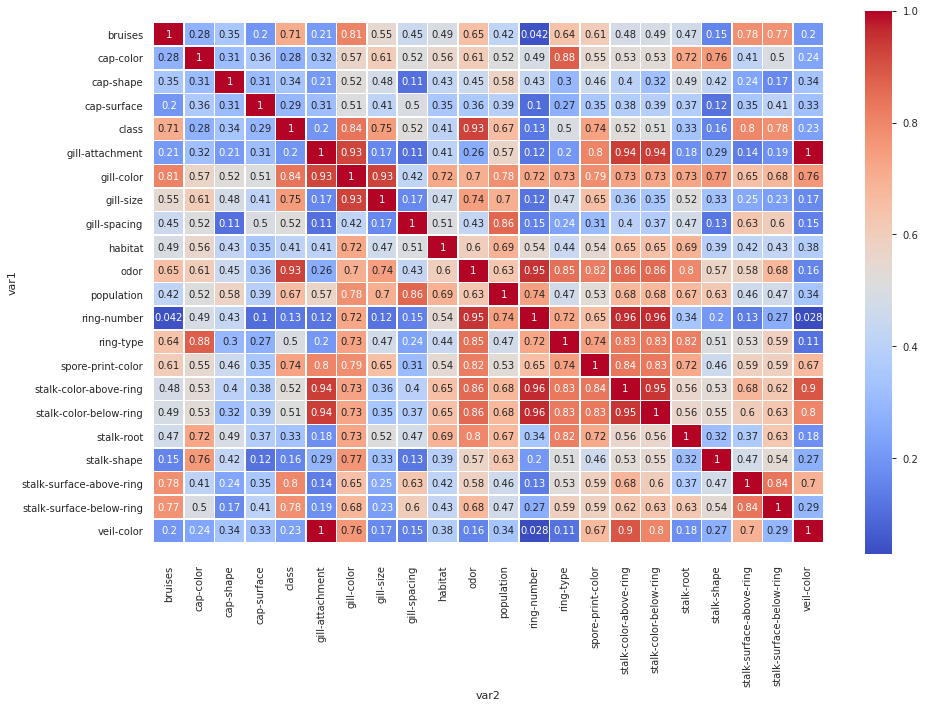

In [15]:
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
map1 = sns.heatmap(df.phik_matrix(), annot= True,  ax = ax, linewidth=0.5, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

---------------------------------------------------

Nominal variable association refers to the statistical relationship(s) on nominal variables.  Nominal variables are variables that are measured at the nominal level, and have no inherent ranking.  Examples of nominal variables that are commonly assessed in social science studies include gender, race, religious affiliation, and college major.  Crosstabulation (also known as contingency or bivariate tables) is commonly used to examine the relationship between nominal variables.

### Cramer's V
n statistics, Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946.
<br>

When the crosstabulation table is larger than 2 x 2, Cramer’s V is the best choice:<br>
<img src="http://www.statisticssolutions.com/wp-content/uploads/2011/06/na3.png"><br>
Here, N is the sample size and k is the smaller of the number of rows or columns (so it would be 3 for a 3 x 4 table).

In [13]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


In [14]:
nominal_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        nominal_cols.append(col)
        
data_nom = df[nominal_cols]

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

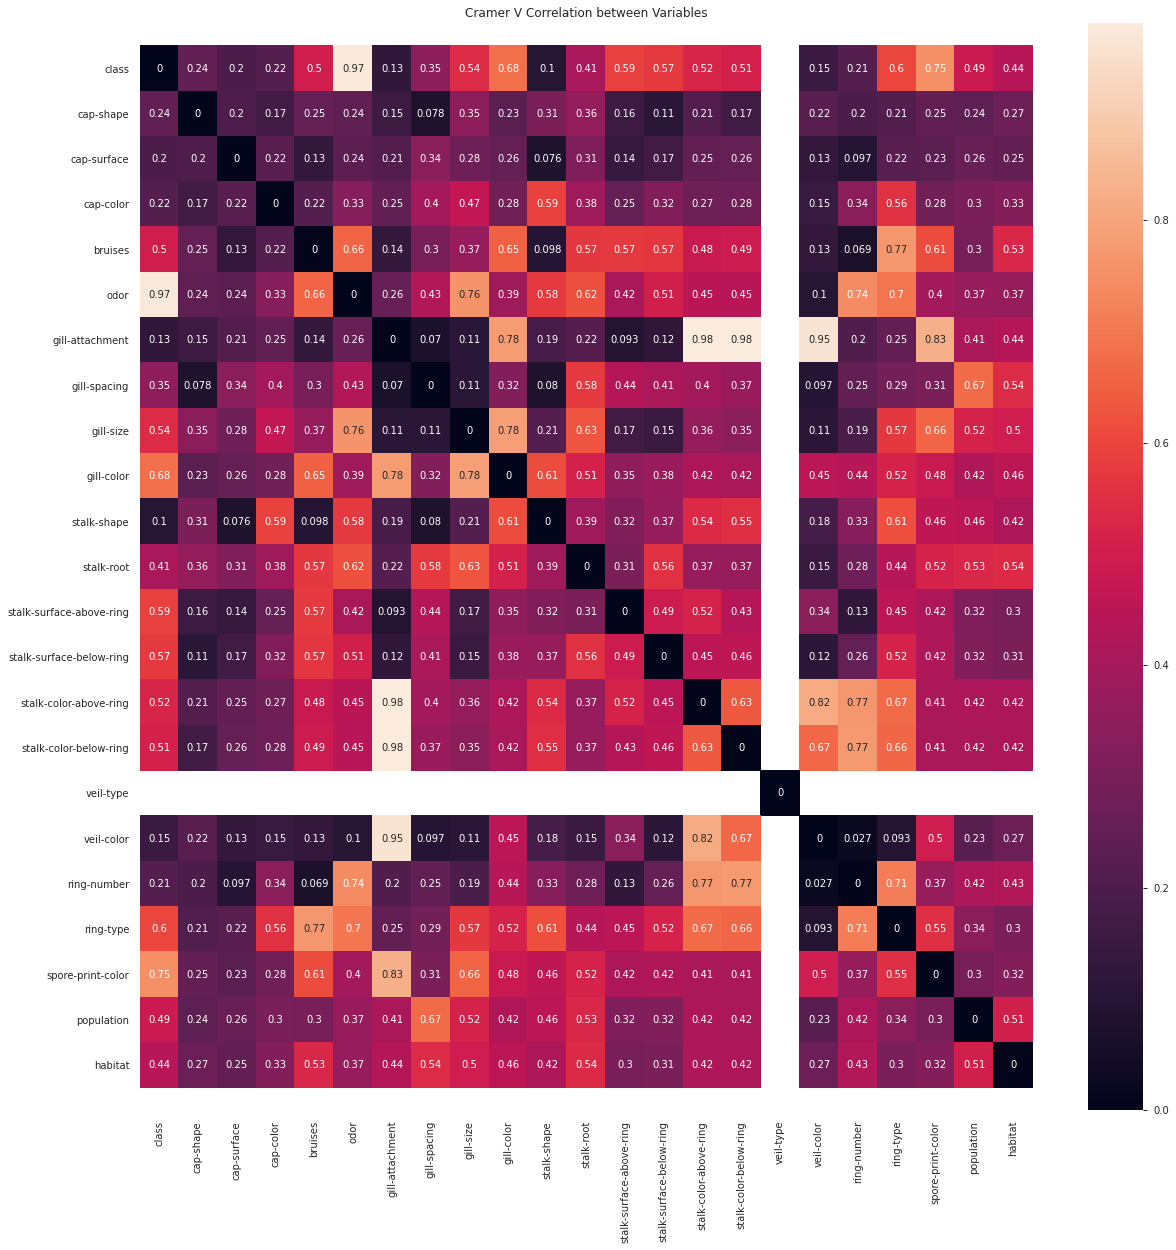

In [15]:
import itertools  
cols = nominal_cols
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Cramer V Correlation between Variables")

# Encoding

Motivo para o qual encoding pode não ser uma boa ideia? <br> 
<img src="https://miro.medium.com/max/1372/1*5zXKfXX0U2zw68ea_CXaeg.png">

Utilizei o encoding ordinal para transformar o dado qualitativo nominal em quantitativo ordinal.<br> 
Não é bem visto embora seja citado o uso de encoding no livro Machine Learning with Python Cookbook_ Practical Solutions from Preprocessing to Deep Learning.

In [ ]:
categorical_columns = []
le = preprocessing.LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        categorical_columns.append(col)
        le.fit(df[col])
        df[col] = le.transform(df[col])

In [ ]:
df.corr(method = 'spearman')

In [ ]:
df.corr(method = 'kendall')

-------------------------------------------------------------------------

### Cohen’s kappa 
a statistic that measures inter-annotator agreement.Essa função calcula o kappa de Cohen, uma pontuação que expressa o nível de concordância entre dois anotadores em um problema de classificação.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html